
# Wine Quality Linear Regression
**Dataset:** UCI Wine Quality (Red & White)  
**Primary objective:** Predict the *quality* score (0–10 integer) using physicochemical features with **Linear Regression**.  






## 2. Datasets overview

The Wine Quality datasets come from the UCI Machine Learning Repository and include physicochemical tests such as acidity, sugar, chlorides, sulfur dioxide, density, pH, sulphates, and alcohol, with a **quality** score assigned by human experts.

- **Red wine:** ~1.6k rows  
- **White wine:** ~4.9k rows  
- **Target:** `quality` (integer; we’ll treat it as **regression** target).  
- **Features:** 11 numeric predictors.  
- **Sources:** UCI Wine Quality datasets (red & white variants). We’ll load both and add a column `wine_type`.



### Load data
This will download the red and white wine CSVs from UCI and combine them with a `wine_type` flag.


In [19]:
import pandas as pd
import numpy as np

RED_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
WHITE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# The UCI files are semicolon-separated
red = pd.read_csv(RED_URL, sep=';')
white = pd.read_csv(WHITE_URL, sep=';')

red['wine_type'] = 'red'
white['wine_type'] = 'white'

df = pd.concat([red, white], ignore_index=True)
print(df.shape)


(6497, 13)


In [20]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Detailed EDA





Display the descriptive statistics and information about the dataframe to understand the data distribution and identify potential issues like missing values.



In [21]:
display(df.describe())
df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB



Create histograms for all numerical columns to visualize their distributions.



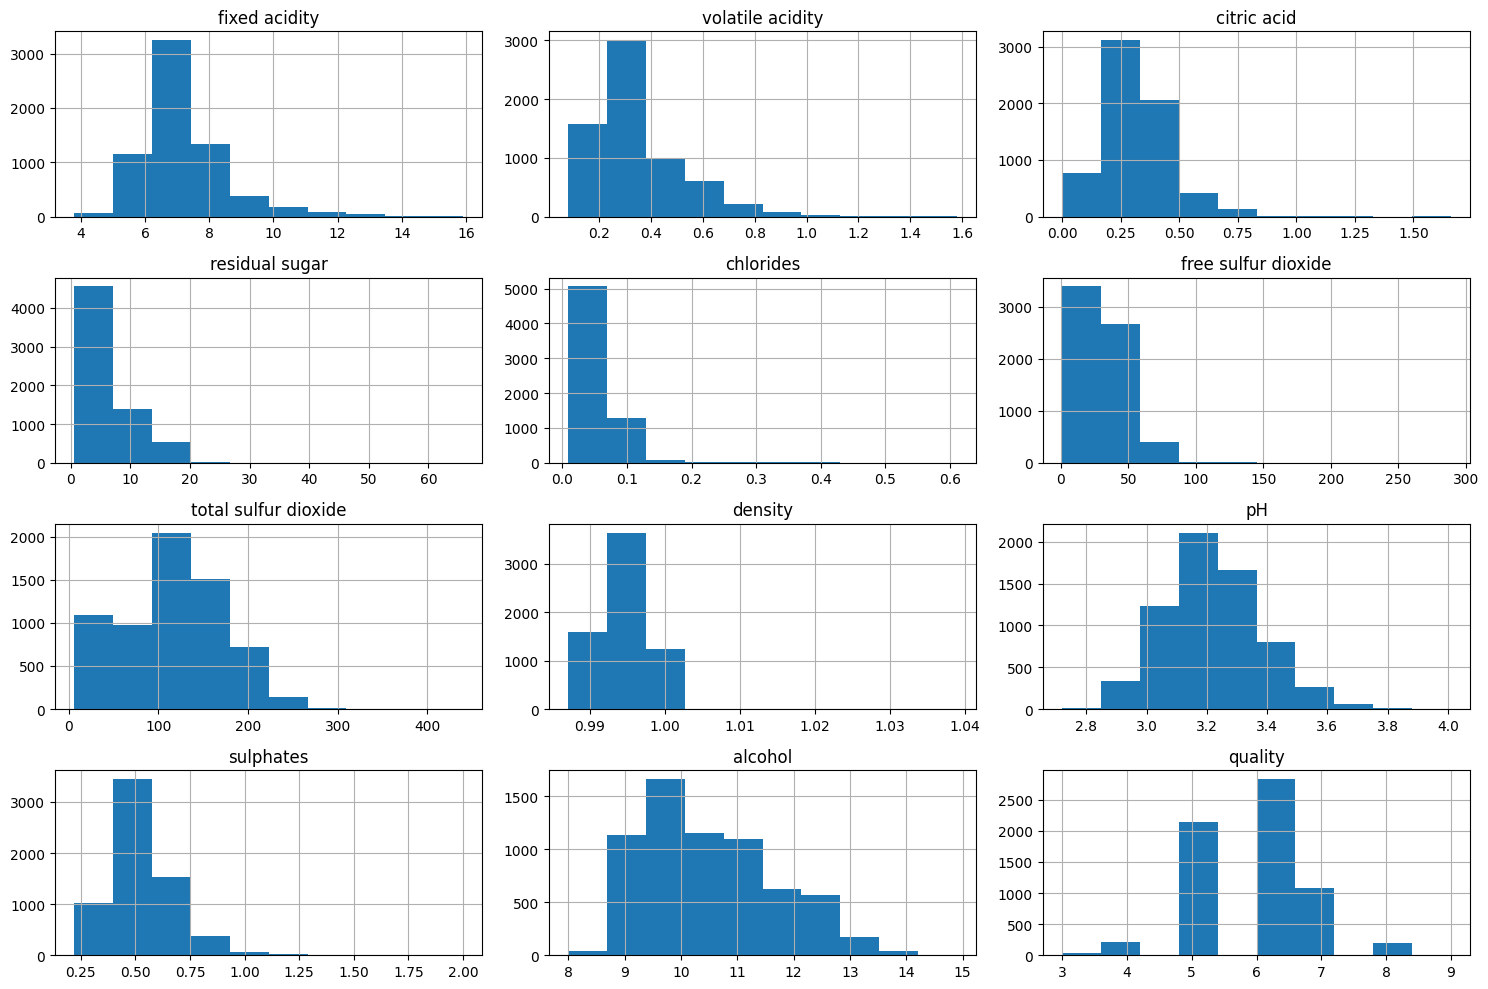

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


Generate and visualize the correlation matrix to understand the relationships between numerical features.



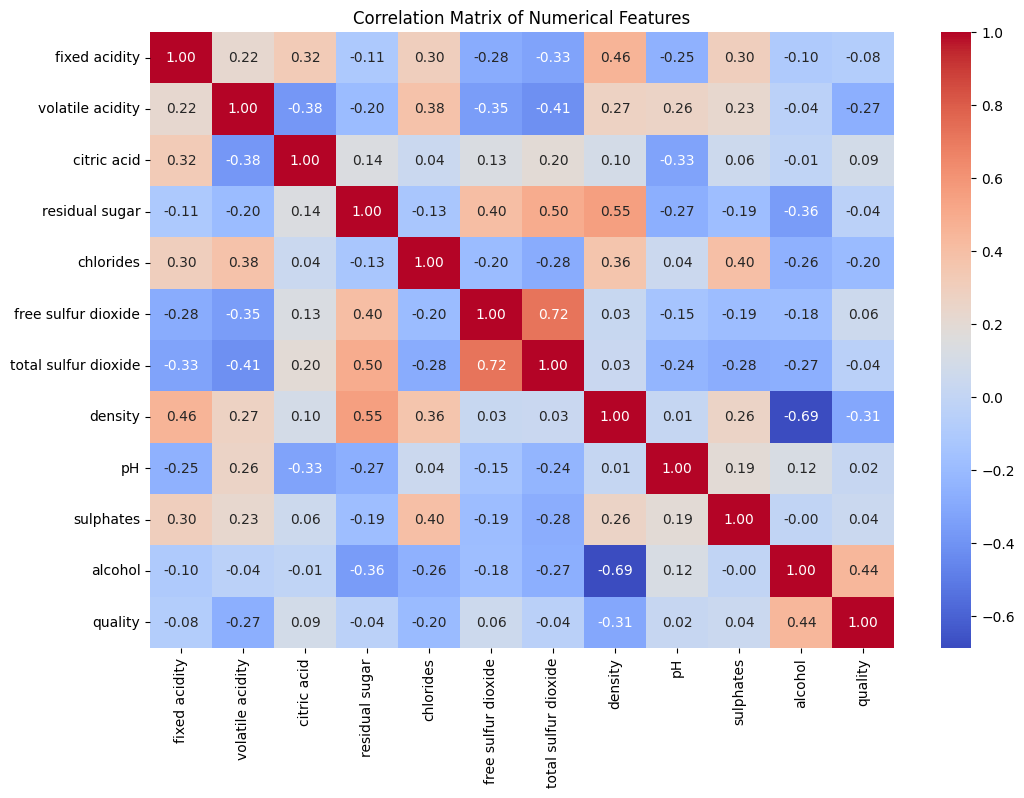

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Create box plots for numerical features, separated by wine type, to identify outliers and compare distributions.



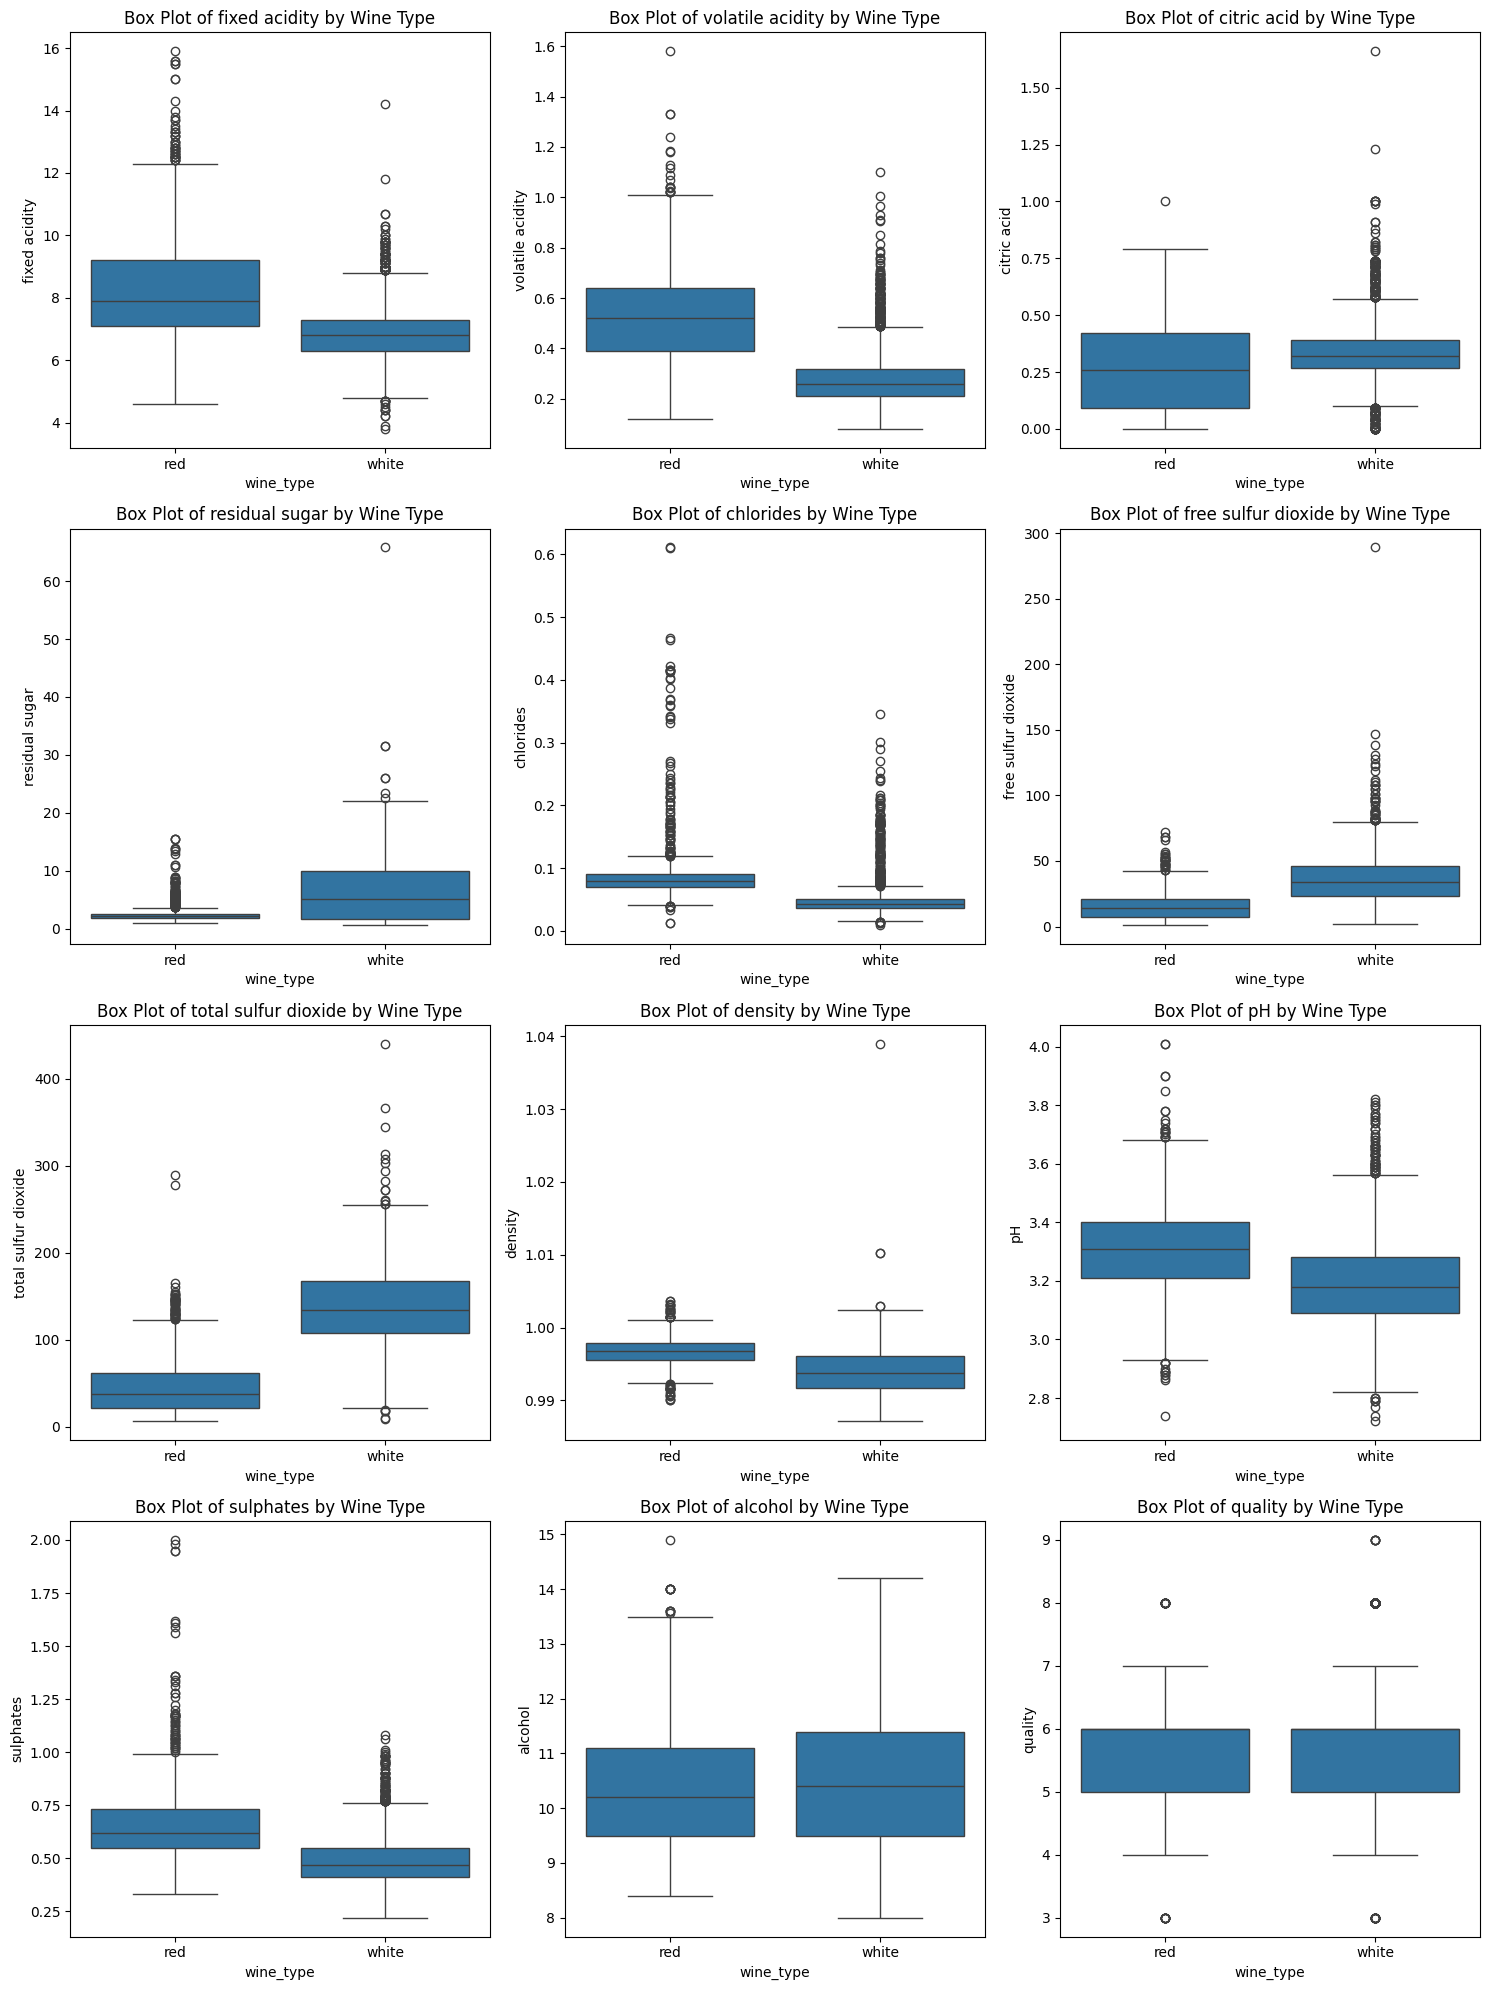

In [24]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numerical_cols)
n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='wine_type', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Wine Type')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Analyze the distribution of the target variable 'quality' using a count plot and explore its relationship with other numerical features through scatter plots.



/tmp/ipython-input-1280627338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


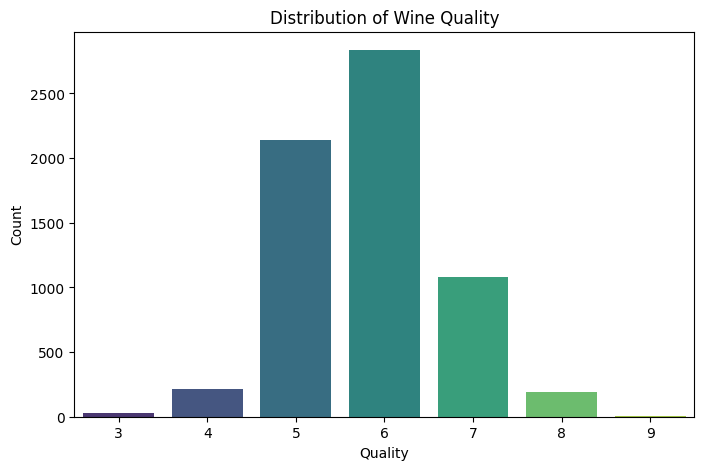

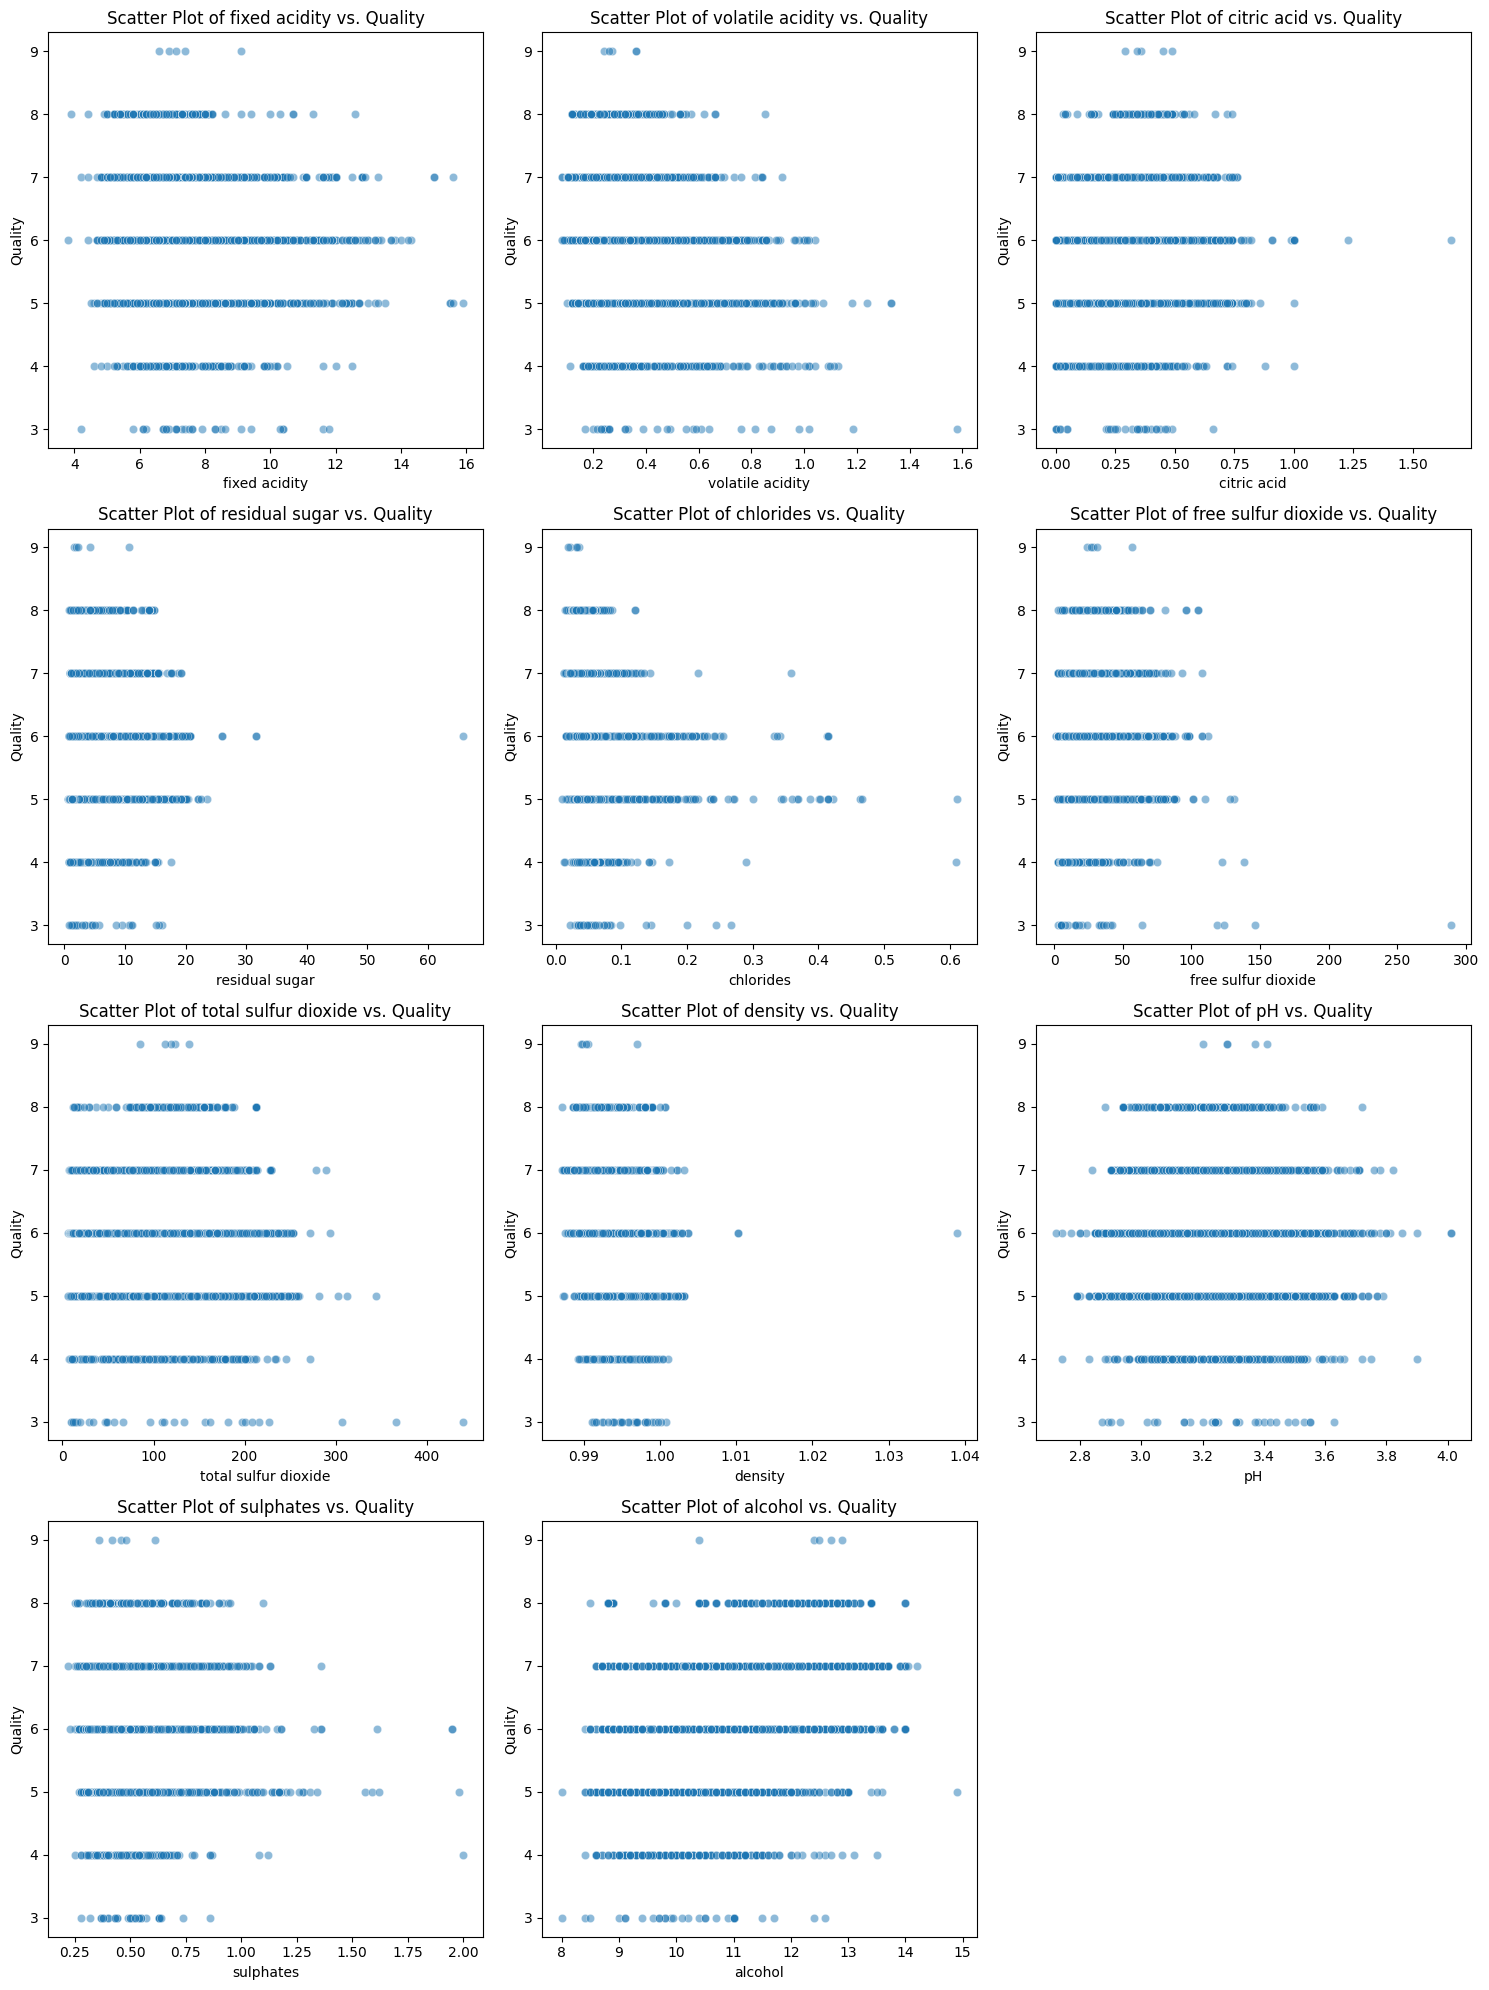

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

numerical_cols_except_quality = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_except_quality.remove('quality')

num_cols = len(numerical_cols_except_quality)
n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_except_quality):
    sns.scatterplot(x=col, y='quality', data=df, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot of {col} vs. Quality')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Quality')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Preprocessing




Identify the categorical column, apply one-hot encoding, separate features and target, identify numerical features, apply standard scaling to numerical features, and concatenate the results to create the preprocessed feature set.



In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Identify the categorical column
categorical_col = 'wine_type'

# 2. Use one-hot encoding
df_encoded = pd.get_dummies(df, columns=[categorical_col], drop_first=True)

# 3. Separate features (X) and target (y)
X = df_encoded.drop('quality', axis=1)
y = df_encoded['quality']

# 4. Identify numerical features
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# 5. Apply a standard scaler to the numerical features
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X[numerical_cols])

# Convert scaled numerical features back to DataFrame
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_cols, index=X.index)

# 6. Concatenate the scaled numerical features and the one-hot encoded categorical features
# The one-hot encoded column is already in X, we just need to make sure it's included.
# Since drop_first=True was used, the 'wine_type_white' column is the one-hot encoded one.
# We need to ensure the order of columns is maintained or handle it explicitly.
# A simpler way is to replace the original numerical columns with the scaled ones in the dataframe.

X_preprocessed = X.copy()
X_preprocessed[numerical_cols] = X_scaled_numerical

# 7. Store the preprocessed features
# X_preprocessed is the final preprocessed feature set
display(X_preprocessed.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type_white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,False
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,False
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,False
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,False
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,False


## Feature engineering





I will create interaction and polynomial features and add them to the preprocessed DataFrame to potentially capture non-linear relationships and improve model performance, then display the head of the updated DataFrame.



In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (e.g., degree 2)
# We will apply this to the scaled numerical features before combining with the categorical feature
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_numerical = poly.fit_transform(X_scaled_numerical_df)

# Get the names of the new polynomial features
poly_feature_names = poly.get_feature_names_out(X_scaled_numerical_df.columns)

# Convert the polynomial features back to a DataFrame
X_poly_numerical_df = pd.DataFrame(X_poly_numerical, columns=poly_feature_names, index=X.index)

# Consider creating some interaction terms manually if domain knowledge suggests them
# For example, interaction between alcohol and volatile acidity, as both are related to taste/quality

# Add interaction terms to the polynomial features DataFrame
# Ensure consistency in indexing
X_poly_numerical_df['alcohol_volatile_acidity_interaction'] = X_preprocessed['alcohol'] * X_preprocessed['volatile acidity']


# Concatenate the polynomial and interaction features with the one-hot encoded categorical feature
# The one-hot encoded column 'wine_type_white' is already in X_preprocessed
# We need to drop the original numerical columns from X_preprocessed before concatenating
X_preprocessed_without_numerical = X_preprocessed.drop(columns=numerical_cols)

# Concatenate the engineered features (polynomial + interaction) with the categorical feature
X_preprocessed = pd.concat([X_poly_numerical_df, X_preprocessed_without_numerical], axis=1)


# Display the head of the updated DataFrame
display(X_preprocessed.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,density sulphates,density alcohol,pH^2,pH sulphates,pH alcohol,sulphates^2,sulphates alcohol,alcohol^2,alcohol_volatile_acidity_interaction,wine_type_white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,...,0.199854,-0.947499,3.287294,0.350102,-1.659818,0.037286,-0.176773,0.838075,-2.003798,False
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,...,0.701191,-0.406910,0.013242,-0.115025,0.066750,0.999157,-0.579824,0.336479,-1.903920,False
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,...,0.612982,-0.445601,0.066626,0.205969,-0.149727,0.636737,-0.462870,0.336479,-1.481088,False
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,...,0.360816,-0.639058,0.132400,-0.119171,0.211068,0.107263,-0.189978,0.336479,0.210239,False
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,...,0.199854,-0.947499,3.287294,0.350102,-1.659818,0.037286,-0.176773,0.838075,-2.003798,False


## Cross-validation





Import the KFold class and instantiate it with the specified parameters.



In [28]:
from sklearn.model_selection import KFold

# Instantiate KFold with 5 splits, shuffling, and a random state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# No further code execution is needed for this subtask.

## Linear regression modeling





Import the LinearRegression model and train it on the preprocessed data.



In [29]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model object
linear_reg_model = LinearRegression()

# Train the Linear Regression model
linear_reg_model.fit(X_preprocessed, y)

LinearRegression()

## Evaluation metrics





Import the necessary metrics and cross-validation functions and then calculate the cross-validated MSE and R-squared scores.



In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Calculate cross-validated MSE
cv_mse_scores = cross_val_score(linear_reg_model, X_preprocessed, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate cross-validated R-squared
cv_r2_scores = cross_val_score(linear_reg_model, X_preprocessed, y, cv=kf, scoring='r2')

# Print the average cross-validated scores
print(f"Average Cross-Validated MSE: {-cv_mse_scores.mean():.4f}")
print(f"Average Cross-Validated R-squared: {cv_r2_scores.mean():.4f}")

Average Cross-Validated MSE: 0.5287
Average Cross-Validated R-squared: 0.3057


## SHAP for Explainable ai




Import the shap library, initialize the explainer, calculate SHAP values, and generate the summary plot to visualize feature importance.



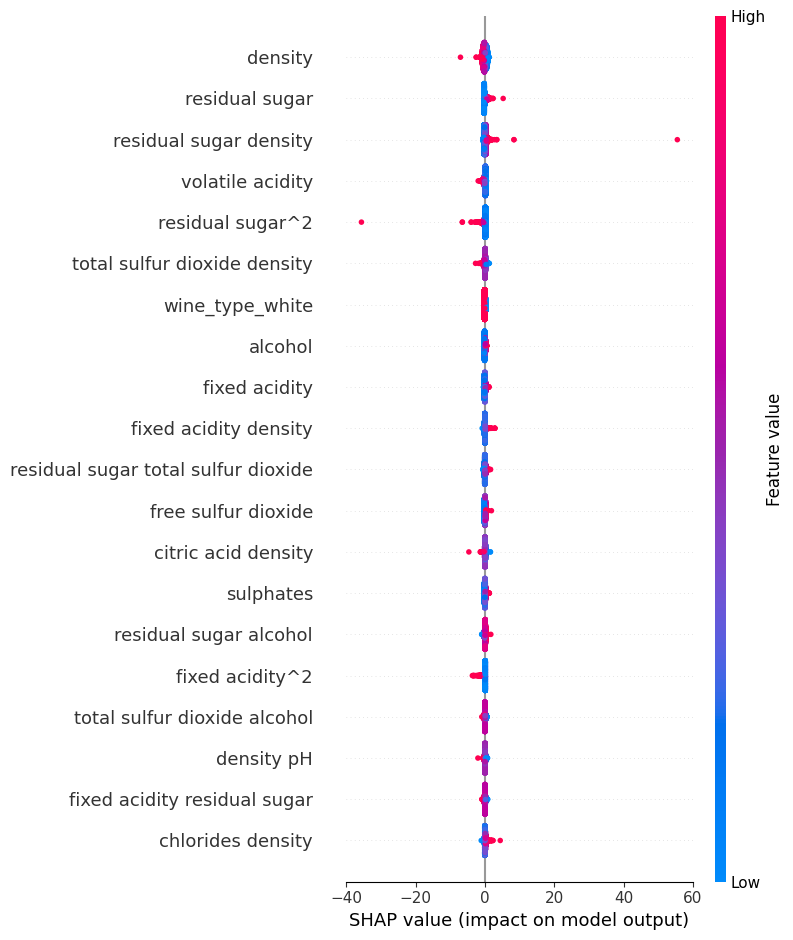

The most important feature is: density


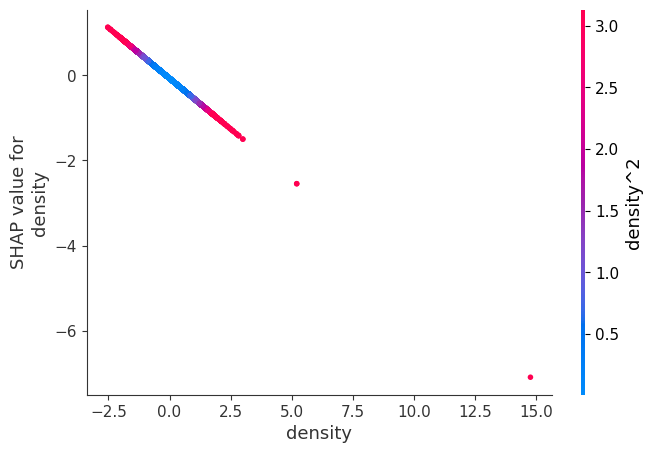

In [31]:
# Convert SHAP values and X_preprocessed to float64 NumPy arrays
shap_values_np = shap_values.values.astype(np.float64)
X_preprocessed_np_float = X_preprocessed.values.astype(np.float64)

# Generate a summary plot of the SHAP values
shap.summary_plot(shap_values_np, X_preprocessed_np_float, feature_names=X_preprocessed.columns)

# Identify the feature with the largest mean absolute SHAP value
mean_abs_shap_values = np.abs(shap_values_np).mean(axis=0)
most_important_feature_index = np.argmax(mean_abs_shap_values)
most_important_feature_name = X_preprocessed.columns[most_important_feature_index]

# Print the most important feature
print(f"The most important feature is: {most_important_feature_name}")

# Generate a dependence plot for the most important feature
shap.dependence_plot(most_important_feature_name, shap_values_np, X_preprocessed_np_float, feature_names=X_preprocessed.columns)